<a href="https://colab.research.google.com/github/ennovak/AI-Detection-LLM/blob/Model-Testing/Emily_Novak_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Necessary Libraries**

In [1]:
# !pip install torchviz # uncomment during first run

In [96]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import joblib
import string
import math
import time
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from gensim.models import Word2Vec
import gensim

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree


# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')  # Additional tagger
nltk.download('tagsets_json')  # Tagset resource

print("\n All libraries imported successfully!")


# Deep Learning Libraries
from keras.layers import Dropout, Dense, GRU, Embedding, LSTM, Bidirectional, TimeDistributed, Flatten, MaxPooling1D
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv1D,Flatten,Embedding,MaxPool1D,concatenate,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,EarlyStopping
from tensorflow.keras.optimizers import Adam

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from tqdm import tqdm


# Logging
import logging
logging.basicConfig(level=logging.INFO)



# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


 All libraries imported successfully!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagse

## Checking/Setting Computation Device

Utilizing pyTorch support of GPU training of neural networks to speed up training process.

In [3]:
use_cuda = torch.cuda.is_available()

# Use this line below to enforce the use of the CPU (in case you don't have a supported GPU)
# use_cuda = False  # Uncomment this line to force CPU usage

device = torch.device("cuda:0" if use_cuda else "cpu")

print("Available device: {}".format(device))
print("If you see 'cuda:0', it means GPU is available and will be used")
print("If you see 'cpu', it means only CPU will be used")

Available device: cpu
If you see 'cuda:0', it means GPU is available and will be used
If you see 'cpu', it means only CPU will be used


# **2. Data Analysis and Preprocessing**

In [4]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving AI_vs_huam_train_dataset.xlsx to AI_vs_huam_train_dataset.xlsx
Saving Final_test_data.csv to Final_test_data.csv


In [4]:
# Read Data
df_train = pd.read_excel('AI_vs_huam_train_dataset.xlsx')
df_test = pd.read_csv('Final_test_data.csv')

In [5]:
print("Dataset Information:")
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Columns: {df_train.columns.tolist()}")

# Show first few rows
print("\nFirst 5 rows of training data:")
print(df_train.head())

# Check sentiment distribution
print("\nLabel distribution:")
print(df_train['label'].value_counts())

Dataset Information:
Training data shape: (3728, 2)
Test data shape: (869, 2)
Columns: ['essay', 'label']

First 5 rows of training data:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0

Label distribution:
label
0    1864
1    1864
Name: count, dtype: int64


## **Text Preprocessing**

Here, we want to "clean" the text data to include only words that provide value. We remove common stopwords and unwanted characters and digits. We do this to reduce the amount of data used in training so that we're not trying to process unnecessary data.

Once we have the cleaned text, we want to transform the text into numerical data that our classifiers can understand using vectors.

In [6]:
#  Advanced Text Preprocessing with Lemmatization

class TextPreprocessor:
    """
    Advanced text preprocessing class with lemmatization
    This will clean text better than basic preprocessing
    """

    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        # Add custom stop words
        self.stop_words.update(['u', 'ur', 'im', 'dont', 'doin', 'ure'])

    def get_wordnet_pos(self, word):
        """Convert POS tag to format accepted by WordNet lemmatizer"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def clean_text(self, text):
        """Basic text cleaning"""
        if not isinstance(text, str):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove URLs, emails, HTML tags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters but keep spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove digits
        text = re.sub(r'\d', '', text)

        # Remove extra whitespace
        text = ' '.join(text.split())

        return text

    def lemmatize_text(self, text):
        """Apply lemmatization with POS tagging"""
        tokens = word_tokenize(text)

        lemmatized_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Get POS tag and lemmatize
                pos_tag = self.get_wordnet_pos(token)
                lemmatized_token = self.lemmatizer.lemmatize(token, pos_tag)
                lemmatized_tokens.append(lemmatized_token)

        return ' '.join(lemmatized_tokens)

    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        cleaned_text = self.clean_text(text)
        lemmatized_text = self.lemmatize_text(cleaned_text)
        return lemmatized_text

print("Text preprocessing class created!")

Text preprocessing class created!


In [7]:
# Apply Text Preprocessing to the "text" column

# Initialize the preprocessor
preprocessor = TextPreprocessor()

print("Applying advanced text preprocessing with lemmatization...")

# Apply preprocessing to training data
df_train['clean_essay'] = df_train['essay'].apply(preprocessor.preprocess)

# Apply preprocessing to test data
df_test['clean_essay'] = df_test['essay'].apply(preprocessor.preprocess)

print("Text preprocessing completed!")

Applying advanced text preprocessing with lemmatization...
Text preprocessing completed!


In [8]:
# Show examples of preprocessing
print("\nExamples of text preprocessing:")
print("Original:", df_train['essay'].iloc[0])
print("Processed:", df_train['clean_essay'].iloc[0])
print()
print("Original:", df_train['essay'].iloc[5])
print("Processed:", df_train['clean_essay'].iloc[5])


Examples of text preprocessing:
Original: International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Although this policy can indeed make fewer sports facilities for ordinary people, investing in the best athletes is vital to develop competitive sports performances in each country.
On the one hand, building specific infrastructure for the best athletes is crucial in order to get better results at international sports events such as The Olympics or the World Cup. The importance of getting better results is that it creates awareness of the importance of sports in society and motivates more people to do a sport. In this way, investing in these developments can help countries to develop an integral sport policy that can benefit everyone.
On the other hand, one can argue that a negative effect could be that less infrastructure is built for the rest of the

In [9]:
# Show vocab before text cleaning
train_vocab = set(" ".join(df_train['essay']).split())
test_vocab = set(" ".join(df_test['essay']).split())

print("=== Vocabulary statistics before text cleaning ===")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")

=== Vocabulary statistics before text cleaning ===
Train unique words : 42,702
Test  unique words : 16,261


In [10]:
# Show vocab after text cleaning
train_vocab = set(" ".join(df_train['clean_essay']).split())
test_vocab = set(" ".join(df_test['clean_essay']).split())

print("=== Vocabulary statistics before text cleaning ===")
print(f"Train unique words : {len(train_vocab):,}")
print(f"Test  unique words : {len(test_vocab):,}")

=== Vocabulary statistics before text cleaning ===
Train unique words : 21,269
Test  unique words : 8,829


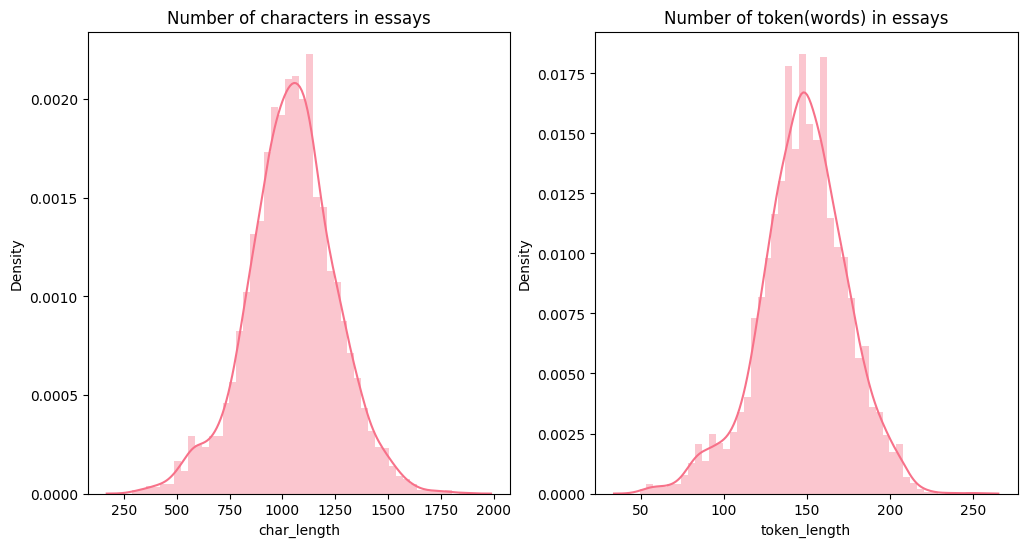

In [11]:
#Distribution of character length and token length in the training data

df_train['char_length'] = df_train['clean_essay'].apply(lambda x : len(x))
df_train['token_length'] = df_train['clean_essay'].apply(lambda x : len(x.split(" ")))

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df_train['char_length'], ax=ax1)
sns.distplot(df_train['token_length'], ax=ax2)
ax1.set_title('Number of characters in essays')
ax2.set_title('Number of token(words) in essays')
plt.show()

In [12]:
# Define features and target
X = df_train['clean_essay']  # All text data
y = df_train['label']       # All labels

print(f"Total input text samples: {len(X)}")
print(f"Total labels: {len(y)}")

# Count labels
label_counts = np.bincount(y)
print(f"Label distribution: {label_counts}")
print(f"Number of 0s (class 0): {label_counts[0]:,}")
print(f"Number of 1s (class 1): {label_counts[1]:,}")

# Calculate percentages
total_samples = len(y)
percentage_0 = (label_counts[0] / total_samples) * 100
percentage_1 = (label_counts[1] / total_samples) * 100

print(f"Percentage of 0s: {percentage_0:.1f}%")
print(f"Percentage of 1s: {percentage_1:.1f}%")

print(f"\nFirst sample: {X.iloc[0][:100]}...")

Total input text samples: 3728
Total labels: 3728
Label distribution: [1864 1864]
Number of 0s (class 0): 1,864
Number of 1s (class 1): 1,864
Percentage of 0s: 50.0%
Percentage of 1s: 50.0%

First sample: international sport event require welltrained athlete country order achieve goal country make effort...


# **3. Create Training and Validation Data**

In [13]:
print("Applying train-test split on pre-processed text data...")

X_train, X_val, y_train, y_val = train_test_split(
    X,                    # preprocessed text data
    y,                    # Labels
    test_size=0.2,        # 20% for validation
    random_state=42,      # For reproducibility
    stratify=y            # Maintain label distribution
)

print(f"Train-test split completed:")
print(f"Training samples: {len(X_train):,}")
print(f"Validation samples: {len(X_val):,}")

Applying train-test split on pre-processed text data...
Train-test split completed:
Training samples: 2,982
Validation samples: 746


In [14]:
# Set random seed for reproducible results
np.random.seed(7)

#Tokenization (Fit ONLY on training data)
print("\n" + "="*60)
print("TOKENIZATION")
print("="*60)

print("Fitting tokenizer on training data only...")

# Initialize tokenizer
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

# Fit tokenizer ONLY on training data
tokenizer.fit_on_texts(X_train)

print(f"\nTokenizer vocabulary size: {len(tokenizer.word_index):,}")

# Get word index (word to integer mapping)
word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens")

# Show most common words
print(f"\nMost frequent words:")
for i, (word, index) in enumerate(list(word_index.items())[:10]):
    print(f"  {i+1}. '{word}': index {index}")


TOKENIZATION
Fitting tokenizer on training data only...

Tokenizer vocabulary size: 18,742
Found 18742 unique tokens

Most frequent words:
  1. 'people': index 1
  2. 'new': index 2
  3. 'risk': index 3
  4. 'take': index 4
  5. 'thing': index 5
  6. 'try': index 6
  7. 'successful': index 7
  8. 'life': index 8
  9. 'success': index 9
  10. 'well': index 10


In [15]:
# Convert texts to sequences
print("Converting texts to sequences...")
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

print("Text to sequence conversion completed.")

Converting texts to sequences...
Text to sequence conversion completed.


In [16]:
# Check sequence lengths before padding
lengths = [len(seq) for seq in X_train_seq]
print(f"Average length: {np.mean(lengths):.1f}")
print(f"Max length: {max(lengths)}")
print(f"95th percentile: {np.percentile(lengths, 95):.1f}")

Average length: 148.2
Max length: 236
95th percentile: 191.0


In [17]:
print("To choose optimal sequence length, we need to analyze our text lengths.")

# Analyze sequence lengths in our dataset
text_lengths = [len(text.split()) for text in df_train['clean_essay']]

print("Our tweet text length statistics:")
print(f"Mean length: {np.mean(text_lengths):.1f} words")
print(f"Median length: {np.median(text_lengths):.1f} words")
print(f"90th percentile: {np.percentile(text_lengths, 90):.0f} words")
print(f"95th percentile: {np.percentile(text_lengths, 95):.0f} words")
print(f"99th percentile: {np.percentile(text_lengths, 99):.0f} words")

coverage_200 = np.mean(np.array(text_lengths) <= 200) * 100
coverage_215 = np.mean(np.array(text_lengths) <= 215) * 100
coverage_220 = np.mean(np.array(text_lengths) <= 220) * 100

# Check coverage with MAX_SEQUENCE_LENGTH
print(f"Coverage with length 200: {coverage_200:.1f}%")
print(f"Coverage with length 215: {coverage_215:.1f}%")
print(f"Coverage with length 220: {coverage_220:.1f}%")

print("\nRECOMMENDATIONS:")
print("="*50)

# Based on our actual data statistics
max_length = int(np.max(text_lengths))
mean_length = np.mean(text_lengths)
percentile_95 = np.percentile(text_lengths, 95)
percentile_99 = np.percentile(text_lengths, 99)

if percentile_99 <= 200:
    recommended = 215
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("   Effect: Perfect for our tweet data, excellent coverage with minimal padding")
elif percentile_99 <= 215:
    recommended = 220
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("   Effect: Optimal for our data, covers all tweets with small buffer")
elif percentile_99 <= 220:
    recommended = 230
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("   Effect: Safe choice, covers all tweets with reasonable buffer")
else:
    recommended = int(percentile_99) + 5
    print(f"RECOMMENDED: MAX_SEQUENCE_LENGTH = {recommended}")
    print("Effect: Covers 99% of tweets with small buffer")

print(f"\nAlternative options:")
if coverage_200 >= 95:
    print(f"• Length 200: Covers {coverage_200:.1f}% - Very fast training")
if coverage_215 >= 99:
    print(f"• Length 215: Covers {coverage_215:.1f}% - Excellent balance")
if coverage_220 == 100:
    print(f"• Length 220: Covers {coverage_220:.1f}% - Conservative choice")

To choose optimal sequence length, we need to analyze our text lengths.
Our tweet text length statistics:
Mean length: 147.8 words
Median length: 148.0 words
90th percentile: 181 words
95th percentile: 191 words
99th percentile: 207 words
Coverage with length 200: 98.0%
Coverage with length 215: 99.8%
Coverage with length 220: 99.9%

RECOMMENDATIONS:
RECOMMENDED: MAX_SEQUENCE_LENGTH = 220
   Effect: Optimal for our data, covers all tweets with small buffer

Alternative options:
• Length 200: Covers 98.0% - Very fast training
• Length 215: Covers 99.8% - Excellent balance


In [18]:
#Padding
print("\n" + "="*60)
print("PADDING SEQUENCES")
print("="*60)

print("Applying padding to sequences...")

# Pad sequences, we set 220 the Maximum length for each sequence
X_train_padded = pad_sequences(X_train_seq, maxlen=220, padding="post")  # padding = "post" adds zeros at the end
X_val_padded = pad_sequences(X_val_seq, maxlen=220, padding='post')

print(f"Padding completed:")
print(f"Training data shape: {X_train_padded.shape}")
print(f"Validation data shape: {X_val_padded.shape}")


PADDING SEQUENCES
Applying padding to sequences...
Padding completed:
Training data shape: (2982, 220)
Validation data shape: (746, 220)


In [19]:
print(f"added sequence (first 3 sentences): {X_train_padded[1:4][:220]}")

added sequence (first 3 sentences): [[ 307   56    8    1  217  600 1370   32 3220   21   37    4    3 6018
   322   48   15 2096  466  133 8280  121   11   35   49 1109  112   73
    56    8  413    1  117   84   58   15   85  307  176   56  659  193
    11   32   12  524  699   37    4    3    6   75    2    5  652   54
   242  695  532  362   60   15   61 1434  814   54 1434  982   37  143
  1434   95 8281   95   26   99  114   70  254    4    3   61  430  104
   474  814   54 1110  991   39    5   12  474  814 1006    4    3  413
   794   54   46 1993   66   62   32  545    2    8   37  413  269    4
     3   60   85  192   56    8 8282   23 3220    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  

### Creating Tensors

Both `x_train_padded` and `X_val` are still sparse matrices. To be used by PyTorch, we need to do 2 more steps.

* Convert the sparse represention to dense representation.

* Convert arrays to Tensors, which is essentially PyTorch's version of arrays.

In [20]:
print("Converting numpy arrays to PyTorch tensors...")

# Convert input data to LongTensor for embedding lookup
X_train_tensor = torch.LongTensor(X_train_padded)
X_val_tensor = torch.LongTensor(X_val_padded)

# Convert pandas Series to numpy arrays first, then to tensors
y_train_tensor = torch.LongTensor(y_train.values)  # # .values converts Series to numpy
y_val_tensor = torch.LongTensor(y_val.values)

print(f"Data conversion completed!")
print(f"X_train shape: {X_train_tensor.shape}")
print(f"X_val shape: {X_val_tensor.shape}")
print(f"y_train shape: {y_train_tensor.shape}")
print(f"y_val shape: {y_val_tensor.shape}")

Converting numpy arrays to PyTorch tensors...
Data conversion completed!
X_train shape: torch.Size([2982, 220])
X_val shape: torch.Size([746, 220])
y_train shape: torch.Size([2982])
y_val shape: torch.Size([746])


### Creating Data Loaders

The [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) class takes a `Dataset` object as input to handle to split the dataset into batches. As such, a data loader also has `batch_size` as an input parameter. In the following, we will use a batch size of 64.

In [21]:
# Create Data Loaders
print("Create Data Loaders")

batch_size = 64

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
x_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Data loaders created!")
print(f"Batch size: {batch_size}")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(x_val_loader)}")

Create Data Loaders
Data loaders created!
Batch size: 64
Training batches: 47
Validation batches: 12


In [22]:
for X_batch, y_batch in train_loader:
    print("Shape of the input:  ", X_batch.shape)
    print("shape of the output: ", y_batch.shape)
    break

Shape of the input:   torch.Size([64, 220])
shape of the output:  torch.Size([64])


# **4. Representing Text as Numerical Data with Word Embeddings**

Before we train our machine learning models, a crucial step is to convert our raw text data into numerical vectors. We will utilize different techniques for this text vectorization process, including:

*   **Word2Vec Embedding**
*   **GloVe Embedding**
*   **FastText Embedding**

### Word2Vec Embedding

In [141]:
# Prepare data for Gensim Word2Vec
# Gensim's Word2Vec expects a list of lists of strings (words)

print("Preparing tokenized sentences for Gensim Word2Vec...")

# Convert the X_train series to a list of tokenized sentences
# Split each cleaned essay string into a list of words
tokenized_sentences_train = [essay.split() for essay in X_train]
vocab_size = len(tokenizer.word_index) + 1

print(f"Vocabulary size: {vocab_size}")

print(f"Prepared {len(tokenized_sentences_train):,} tokenized sentences from X_train.")
print("First tokenized sentence:", tokenized_sentences_train[0][:20]) # Print first 20 words of first sentence

# Now, train the Word2Vec model using the tokenized sentences
print("\nTraining Gensim Word2Vec model...")
word2vec_model = gensim.models.Word2Vec(
    sentences=tokenized_sentences_train,
    min_count=1,
    window=5,
    sg=0 # sg=0 for CBOW, sg=1 for Skip-gram
)

embedding_dict = dict({})
for idx, key in enumerate(word2vec_model.wv.key_to_index.keys()):
    embedding_dict[key] = word2vec_model.wv[key]

print("Word2Vec model training completed.")

Preparing tokenized sentences for Gensim Word2Vec...
Vocabulary size: 18743
Prepared 2,982 tokenized sentences from X_train.
First tokenized sentence: ['manner', 'workplace', 'always', 'topic', 'discuss', 'many', 'people', 'essential', 'know', 'behave', 'formal', 'environment', 'company', 'give', 'opinion', 'worker', 'smart', 'look', 'others', 'consider']

Training Gensim Word2Vec model...
Word2Vec model training completed.


In [142]:
# summarize vocabulary size in model
words = list(word2vec_model.wv.key_to_index.keys())
print('Vocabulary size: %d' % len(words))

Vocabulary size: 18742


#### Create Embedding Matrix

In [145]:
# Create Embedding Matrix
print("Converting embedding dictionary to embedding matrix...")

# Create embedding matrix
emb_matrix = np.zeros((vocab_size, 100))

words_found = 0
uncovered_words = []

for word, i in tokenizer.word_index.items():
    emb_word = embedding_dict.get(word)
    if emb_word is not None:
        emb_matrix[i] = emb_word
        words_found += 1
    else:
        uncovered_words.append(word)

coverage_percentage = (words_found / len(tokenizer.word_index)) * 100

print(f"Embedding matrix created:")
print(f"Matrix shape: {emb_matrix.shape}")
print(f"Words found in Word2Vec: {words_found:,} / {len(tokenizer.word_index):,}")
print(f"Coverage: {coverage_percentage:.2f}%")

# Show uncovered words
if uncovered_words:
    print(f"Sample uncovered words: {uncovered_words[:10]}")

Converting embedding dictionary to embedding matrix...
Embedding matrix created:
Matrix shape: (18743, 100)
Words found in Word2Vec: 18,742 / 18,742
Coverage: 100.00%


#### Create Embedding Layer

In [146]:
#Create Embedding Layer
print("\n" + "="*60)
print("Create Embedding Layer")
print("="*60)

# Create embedding layer
w2v_embedding_layer = Embedding(
    vocab_size, #padding token at index 0, + 1 ensure our embedding layer can handle all possible token indices without errors.
    100,
    embeddings_initializer=tf.keras.initializers.Constant(emb_matrix),
    trainable=False  # Set to False if you want to freeze the embeddings
)

print("Embedding layer created successfully!")


Create Embedding Layer
Embedding layer created successfully!


### GloVe Embedding

In [29]:
# Download Embeddings from huggingface
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
!unzip glove.6B.zip

--2025-06-27 01:33:15--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 3.166.152.110, 3.166.152.105, 3.166.152.65, ...
Connecting to huggingface.co (huggingface.co)|3.166.152.110|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27glove.6B.zip%3B+filename%3D%22glove.6B.zip%22%3B&response-content-type=application%2Fzip&Expires=1750991595&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1MDk5MTU5NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9zdGFuZm9yZG5scC9nbG92ZS82NDcxMzgyY2RkODM3NTQ0YmYzYWM3MjQ5N2EzODcxNWU4NDU4OTdkMjY1YjJiNDI0YjQ3NjE4MzIwMDljODM3P3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiZyZXNwb25zZS1jb250ZW50LXR5cGU9KiJ9XX0_&Signature=brlAtLfr2CAoiBW7p9vhGJRH9Ig0gId-APu8AFcsT2Xukg4RQxy

In [49]:
#Load GloVe Embeddings
print("\n" + "="*60)
print("LOADING GLOVE EMBEDDINGS")
print("="*60)

print("Loading GloVe embeddings...")

# Load GloVe Embeddings
embedding_dict = {}
pretrain = open("glove.6B.50d.txt", encoding="utf8")
for i in pretrain:
    value = i.split(" ")
    word = value[0]
    vector = np.asarray(value[1:])
    embedding_dict[word] = vector
pretrain.close()

print(f"GloVe embeddings loaded: {len(embedding_dict):,} words")


LOADING GLOVE EMBEDDINGS
Loading GloVe embeddings...
GloVe embeddings loaded: 400,001 words


#### Building the Embedding Matrix

In [50]:
# Create Embedding Matrix
print("Converting embedding dictionary to embedding matrix...")

# Create embedding matrix
emb_matrix = np.zeros((len(tokenizer.word_index)+1, 50))

words_found = 0
uncovered_words = []

for word, i in tokenizer.word_index.items():
    emb_word = embedding_dict.get(word)
    if emb_word is not None:
        emb_matrix[i] = emb_word
        words_found += 1
    else:
        uncovered_words.append(word)

coverage_percentage = (words_found / len(tokenizer.word_index)) * 100

print(f"Embedding matrix created:")
print(f"Matrix shape: {emb_matrix.shape}")
print(f"Words found in GloVe: {words_found:,} / {len(tokenizer.word_index):,}")
print(f"Coverage: {coverage_percentage:.2f}%")

# Show uncovered words
if uncovered_words:
    print(f"Sample uncovered words: {uncovered_words[:10]}")

Converting embedding dictionary to embedding matrix...
Embedding matrix created:
Matrix shape: (18743, 50)
Words found in GloVe: 9,962 / 18,742
Coverage: 53.15%
Sample uncovered words: ['successfull', 'hadnt', 'shouldnt', 'risktaking', 'succed', 'youve', 'heshe', 'theyve', 'selfconfidence', 'risktakers']


#### Create Embedding Layer

In [32]:
len(tokenizer.index_word)

18742

In [91]:
#Create Embedding Layer
print("\n" + "="*60)
print("Create Embedding Layer")
print("="*60)

# Create embedding layer
glove_embedding_layer = Embedding(
    len(tokenizer.word_index)+1, #padding token at index 0, + 1 ensure our embedding layer can handle all possible token indices without errors.
    50,
    embeddings_initializer=tf.keras.initializers.Constant(emb_matrix),
    trainable=False  # Set to False if you want to freeze the embeddings
)

print("Embedding layer created successfully!")


Create Embedding Layer
Embedding layer created successfully!


In [52]:
# Summary
print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"Final training data shape: {X_train_padded.shape}")
print(f"Final validation data shape: {X_val_padded.shape}")
print(f"Vocabulary size: {len(tokenizer.word_index):,}")
print(f"Embedding matrix shape: {emb_matrix.shape}")
print(f"Sequence length: {X_train_padded.shape[1]}")
print("Ready for model training!")


PREPROCESSING SUMMARY
Final training data shape: (2982, 220)
Final validation data shape: (746, 220)
Vocabulary size: 18,742
Embedding matrix shape: (18743, 50)
Sequence length: 220
Ready for model training!


### FastText Embedding

In [147]:
from gensim.models import FastText

# Training FastText model
fasttext_model = FastText(sentences=tokenized_sentences_train, vector_size=100, window=5, min_count=2, workers=4, sg=0)

# Example usage: getting embeddings for a word
word_embedding = fasttext_model.wv['computer']

# Most similar words to a given word
similar_words = fasttext_model.wv.most_similar('computer')

print("Most similar words to 'computer':", similar_words)

embedding_dict = dict({})
for idx, key in enumerate(fasttext_model.wv.key_to_index.keys()):
    embedding_dict[key] = fasttext_model.wv[key]

Most similar words to 'computer': [('compute', 0.9775287508964539), ('computerize', 0.9682368040084839), ('later', 0.9297431111335754), ('software', 0.9117178320884705), ('programer', 0.9086176753044128), ('programmer', 0.904893159866333), ('msdos', 0.8981128931045532), ('engineer', 0.8964751958847046), ('bug', 0.8960717916488647), ('water', 0.8929591178894043)]


In [148]:
# summarize vocabulary size in model
words = list(fasttext_model.wv.key_to_index.keys())
print('Vocabulary size: %d' % len(words))

Vocabulary size: 8277


#### Create Embedding Matrix

In [149]:
# Create Embedding Matrix
print("Converting embedding dictionary to embedding matrix...")

# Create embedding matrix
emb_matrix = np.zeros((vocab_size, 100))

words_found = 0
uncovered_words = []

for word, i in tokenizer.word_index.items():
    emb_word = embedding_dict.get(word)
    if emb_word is not None:
        emb_matrix[i] = emb_word
        words_found += 1
    else:
        uncovered_words.append(word)

coverage_percentage = (words_found / len(tokenizer.word_index)) * 100

print(f"Embedding matrix created:")
print(f"Matrix shape: {emb_matrix.shape}")
print(f"Words found in FastText: {words_found:,} / {len(tokenizer.word_index):,}")
print(f"Coverage: {coverage_percentage:.2f}%")

# Show uncovered words
if uncovered_words:
    print(f"Sample uncovered words: {uncovered_words[:10]}")

Converting embedding dictionary to embedding matrix...
Embedding matrix created:
Matrix shape: (18743, 100)
Words found in FastText: 8,277 / 18,742
Coverage: 44.16%
Sample uncovered words: ['politely', 'workmate', 'wiew', 'manegerial', 'thinh', 'stead', 'announcement', 'somethoing', 'hget', 'culd']


#### Create Embedding Layer

In [150]:
#Create Embedding Layer
print("\n" + "="*60)
print("Create Embedding Layer")
print("="*60)

# Create embedding layer
ft_embedding_layer = Embedding(
    vocab_size, #padding token at index 0, + 1 ensure our embedding layer can handle all possible token indices without errors.
    100,
    embeddings_initializer=tf.keras.initializers.Constant(emb_matrix),
    trainable=False  # Set to False if you want to freeze the embeddings
)

print("Embedding layer created successfully!")


Create Embedding Layer
Embedding layer created successfully!


# **5. Deep Learning Model Training and Testing**

We will train and test Deep Learning algorithms by feeding them word embeddings data that has been vectorized using `Glove`.

* Convolutional Neural Networks (CNN)
* Recurrent Neural Networks (RNN)
* Long Short-Term Memory (LSTM)

### CNN Model

In [152]:
# define CNN model with word2vec embedding
w2v_cnn_model = Sequential()
w2v_cnn_model.add(w2v_embedding_layer)
w2v_cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
w2v_cnn_model.add(MaxPooling1D(pool_size=2))
w2v_cnn_model.add(Flatten())
w2v_cnn_model.add(Dense(1, activation='sigmoid'))

In [153]:
# compile network
w2v_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
w2v_cnn_model.fit(X_train_padded, y_train, epochs=10, verbose=2)
# evaluate
w2v_loss, w2v_acc = w2v_cnn_model.evaluate(X_val_padded, y_val, verbose=0)
print('Test Accuracy: %f' % (w2v_acc*100))

Epoch 1/10
94/94 - 10s - 112ms/step - accuracy: 0.7072 - loss: 0.5524
Epoch 2/10
94/94 - 8s - 89ms/step - accuracy: 0.8635 - loss: 0.3113
Epoch 3/10
94/94 - 9s - 97ms/step - accuracy: 0.9209 - loss: 0.2144
Epoch 4/10
94/94 - 6s - 64ms/step - accuracy: 0.9423 - loss: 0.1584
Epoch 5/10
94/94 - 6s - 65ms/step - accuracy: 0.9759 - loss: 0.0937
Epoch 6/10
94/94 - 5s - 52ms/step - accuracy: 0.9923 - loss: 0.0485
Epoch 7/10
94/94 - 7s - 79ms/step - accuracy: 0.9983 - loss: 0.0336
Epoch 8/10
94/94 - 5s - 51ms/step - accuracy: 0.9993 - loss: 0.0169
Epoch 9/10
94/94 - 6s - 69ms/step - accuracy: 1.0000 - loss: 0.0093
Epoch 10/10
94/94 - 10s - 103ms/step - accuracy: 1.0000 - loss: 0.0064
Test Accuracy: 87.131369


In [154]:
# define CNN model with gloVe embedding
glove_cnn_model = Sequential()
glove_cnn_model.add(glove_embedding_layer)
glove_cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
glove_cnn_model.add(MaxPooling1D(pool_size=2))
glove_cnn_model.add(Flatten())
glove_cnn_model.add(Dense(1, activation='sigmoid'))

In [155]:
# compile network
glove_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
glove_cnn_model.fit(X_train_padded, y_train, epochs=10, verbose=2)
# evaluate
glove_loss, glove_acc = glove_cnn_model.evaluate(X_val_padded, y_val, verbose=0)
print('Test Accuracy: %f' % (glove_acc*100))

Epoch 1/10
94/94 - 5s - 49ms/step - accuracy: 0.6395 - loss: 0.6480
Epoch 2/10
94/94 - 5s - 55ms/step - accuracy: 0.8524 - loss: 0.3766
Epoch 3/10
94/94 - 5s - 58ms/step - accuracy: 0.9195 - loss: 0.2457
Epoch 4/10
94/94 - 3s - 33ms/step - accuracy: 0.9520 - loss: 0.1626
Epoch 5/10
94/94 - 5s - 54ms/step - accuracy: 0.9863 - loss: 0.0930
Epoch 6/10
94/94 - 8s - 80ms/step - accuracy: 0.9940 - loss: 0.0628
Epoch 7/10
94/94 - 8s - 83ms/step - accuracy: 0.9993 - loss: 0.0357
Epoch 8/10
94/94 - 4s - 43ms/step - accuracy: 1.0000 - loss: 0.0208
Epoch 9/10
94/94 - 5s - 52ms/step - accuracy: 1.0000 - loss: 0.0152
Epoch 10/10
94/94 - 3s - 33ms/step - accuracy: 1.0000 - loss: 0.0112
Test Accuracy: 82.975870


In [156]:
# define CNN model with FastText embedding
ft_cnn_model = Sequential()
ft_cnn_model.add(ft_embedding_layer)
ft_cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
ft_cnn_model.add(MaxPooling1D(pool_size=2))
ft_cnn_model.add(Flatten())
ft_cnn_model.add(Dense(1, activation='sigmoid'))

In [157]:
# compile network
ft_cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
ft_cnn_model.fit(X_train_padded, y_train, epochs=10, verbose=2)
# evaluate
ft_loss, ft_acc = ft_cnn_model.evaluate(X_val_padded, y_val, verbose=0)
print('Test Accuracy: %f' % (ft_acc*100))

Epoch 1/10
94/94 - 10s - 102ms/step - accuracy: 0.7096 - loss: 0.5521
Epoch 2/10
94/94 - 5s - 51ms/step - accuracy: 0.8581 - loss: 0.3112
Epoch 3/10
94/94 - 5s - 57ms/step - accuracy: 0.9168 - loss: 0.2220
Epoch 4/10
94/94 - 8s - 87ms/step - accuracy: 0.9470 - loss: 0.1508
Epoch 5/10
94/94 - 5s - 52ms/step - accuracy: 0.9802 - loss: 0.0867
Epoch 6/10
94/94 - 7s - 77ms/step - accuracy: 0.9903 - loss: 0.0555
Epoch 7/10
94/94 - 8s - 83ms/step - accuracy: 0.9953 - loss: 0.0367
Epoch 8/10
94/94 - 8s - 82ms/step - accuracy: 0.9997 - loss: 0.0183
Epoch 9/10
94/94 - 8s - 82ms/step - accuracy: 1.0000 - loss: 0.0121
Epoch 10/10
94/94 - 7s - 79ms/step - accuracy: 1.0000 - loss: 0.0076
Test Accuracy: 84.584451


In [163]:
# Embeddings Accuracy comparison
print("\n" + "="*45)
print("EMBEDDINGS ACCURACY COMPARISON")
print("="*45)

print(f"{'Embedding':<20} {'Accuracy':<10} {'Loss':<12}")
print("-" * 45)
print(f"{'Word2Vec':<20} {(w2v_acc*100):.2f}     {(w2v_loss*100):.2f}")
print(f"{'GloVe':<20} {(glove_acc*100):.2f}     {(glove_loss*100):.2f}")
print(f"{'FastText':<20} {(ft_acc*100):.2f}     {(ft_loss*100):.2f}")


EMBEDDINGS ACCURACY COMPARISON
Embedding            Accuracy   Loss        
---------------------------------------------
Word2Vec             87.13     42.00
GloVe                82.98     44.31
FastText             84.58     47.58


From Testing, Word2Vec embedding resulted in the highest accuracy with the lowest loss across 10 epochs, so we will continue with using Word2Vec embedding for the CNN model.

In [164]:
# assigning final CNN model
cnn_model = w2v_cnn_model

### RNN Model